In [15]:
import sys
sys.path.insert(0,'../')
import os
#run on cpu to not interfere with trianing
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from net.hourglass import HourglassNet
from eval.heatmap_process import post_process_heatmap
import glob
import cv2
import matplotlib.pyplot as plt
import scipy
import imageio
from top.demo import render_joints
import numpy as np
from imgaug import augmenters as iaa



In [21]:
def normalize(imgdata, color_mean):
    '''
    :param imgdata: image in 0 ~ 255
    :return:  image from 0.0 to 1.0
    '''
    imgdata = imgdata/255.0

    for i in range(imgdata.shape[-1]):
        imgdata[:, :, i] -= color_mean[i]

    return imgdata

def inference_rgb(net, rgbdata, orgshape, mean=None):

    scale = (orgshape[0] * 1.0 / inres[0], orgshape[1] * 1.0 / inres[1])
    img_scale = iaa.Scale({"height": inres[0], "width": inres[1]})

    imgdata = img_scale.augment_image(rgbdata)

    mean = np.array([0.4404, 0.4440, 0.4327], dtype=np.float)

    imgdata = normalize(imgdata, mean)

    input = imgdata[np.newaxis, :, :, :]

    out = net.model.predict(input)
    return out[-1], scale

def inference_file(imgfile, net):
    imgdata = imageio.imread(imgfile)
    ret = inference_rgb(net,imgdata, imgdata.shape)
    return ret

In [32]:
num_class=14
num_stack=2
model_dir="../../trained_models/MPII_original_100"
model_json="net_arch.json"
epoch=42
model_weights="weights_epoch"+str(epoch)+".h5"
inres=(256, 256)
outres=(64,64)
xnet = HourglassNet(num_class, num_stack, inres, outres)
model_json=os.path.join(model_dir, model_json)
model_weights=os.path.join(model_dir, model_weights)

xnet.load_model(model_json, model_weights)



lspet_0.jpg
93.01106056010515
57.80098490534725
(105, 157, 3)
0.00085723813


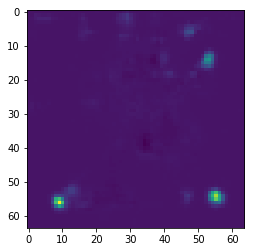

0.0018589643


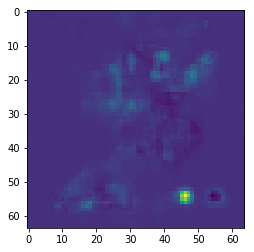

0.0018714822


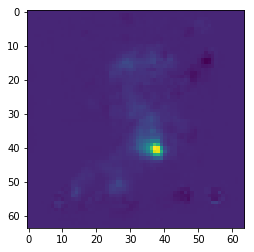

0.0010708405


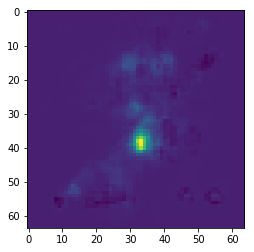

0.0009929527


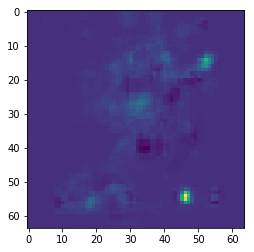

0.0018018612


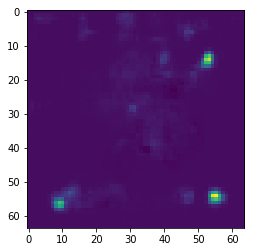

0.0013710351


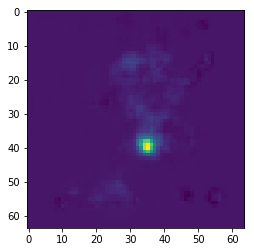

0.0016461583


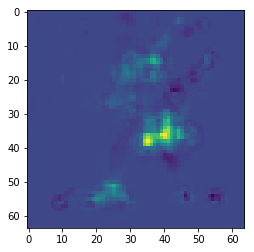

0.00063021854


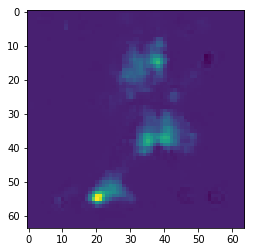

0.001491012


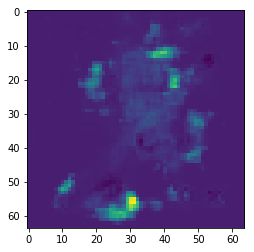

0.0019121888


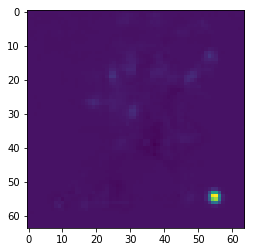

0.0029609303


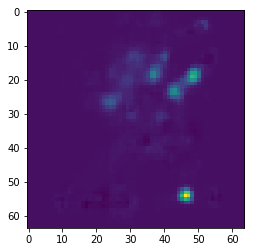

0.0030503557


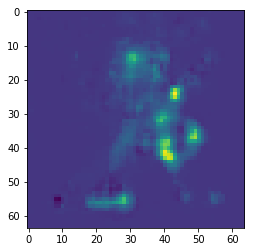

0.0024935752


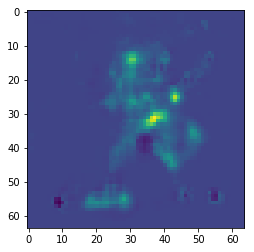

0.002170336


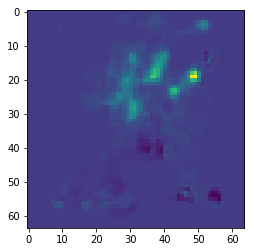

0.00045582058


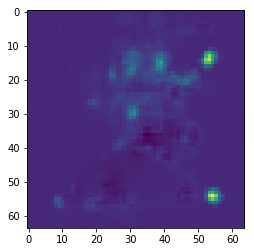

[(22.078125, 91.875, 0.12169596), (112.84375, 88.59375, 0.054699656), (90.765625, 65.625, 0.06780236), (80.953125, 62.34375, 0.058242667), (112.84375, 88.59375, 0.050662737), (134.921875, 88.59375, 0.09475163), (85.859375, 65.625, 0.080698855), (98.125, 59.0625, 0.026315246), (49.0625, 90.234375, 0.08268379), (76.046875, 91.875, 0.043851793), (134.921875, 88.59375, 0.17379366), (112.84375, 88.59375, 0.10941271), (105.484375, 39.375, 0.044998966), (90.765625, 50.859375, 0.034096915), (120.203125, 31.171875, 0.035175893), (132.46875, 88.59375, 0.043923214)]


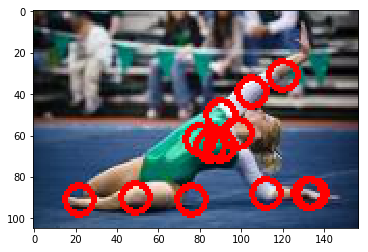

yoga2.jpg
225.56774039498413
68.86386516674897
(349, 620, 3)
0.00079814985


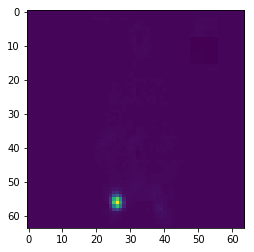

0.0015257897


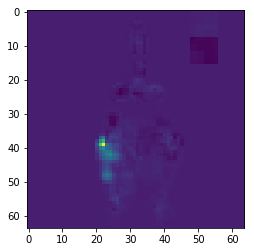

0.0015086175


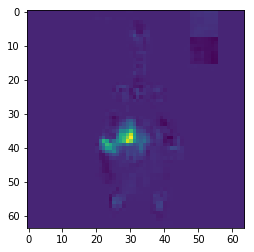

0.00068806316


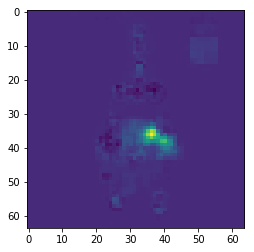

0.0008056567


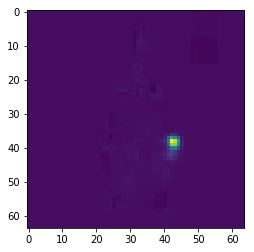

0.0013088144


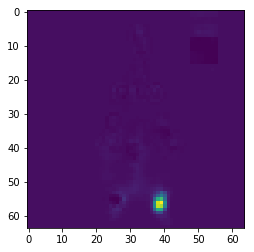

0.0007129696


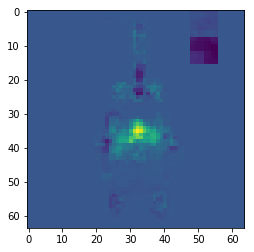

0.002810685


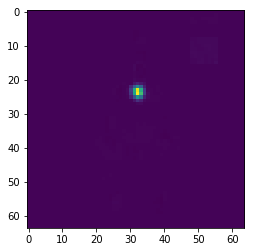

-0.00051142153


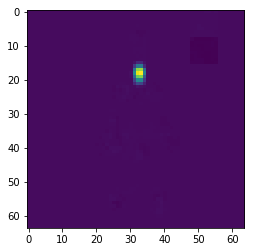

0.0017575441


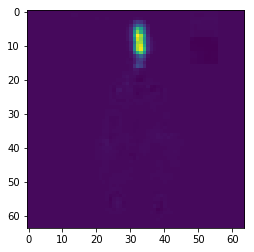

0.0020446826


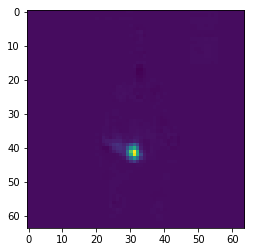

0.0028134629


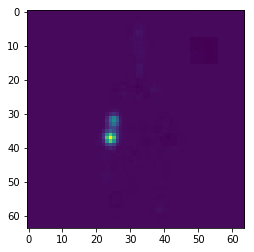

0.0024017612


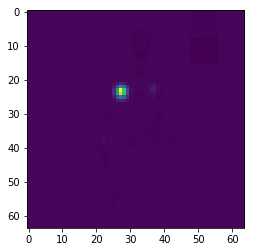

0.0029083095


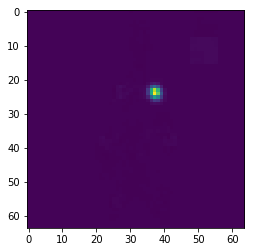

0.0020808885


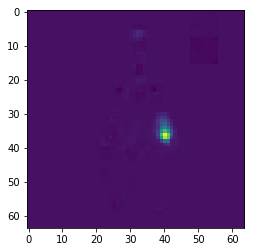

-0.00023896084


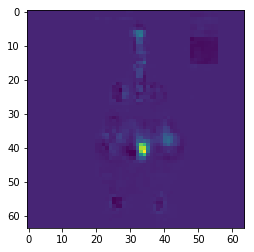

[(251.875, 305.375, 0.46478635), (213.125, 212.671875, 0.08552109), (290.625, 201.765625, 0.050905116), (348.75, 196.3125, 0.046375893), (406.875, 207.21875, 0.2240456), (377.8125, 305.375, 0.1827514), (310.0, 190.859375, 0.02776049), (310.0, 130.875, 0.63807), (319.6875, 98.15625, 0.47305083), (310.0, 38.171875, 0.3060722), (300.3125, 223.578125, 0.28258944), (232.5, 201.765625, 0.4721839), (261.5625, 125.421875, 0.593626), (358.4375, 130.875, 0.5683865), (387.5, 196.3125, 0.2435769), (329.375, 223.578125, 0.055568557)]


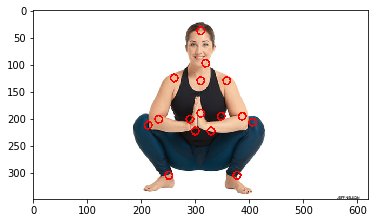

yoga1.jpg
223.3097242455775
67.61428026223514
(620, 620, 3)
0.00044073857


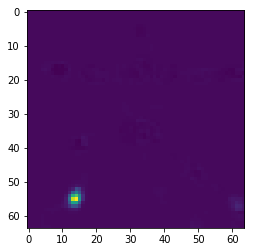

0.0018624724


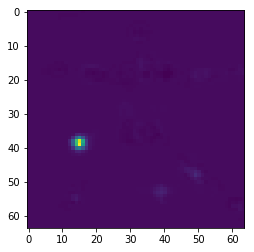

0.0023026713


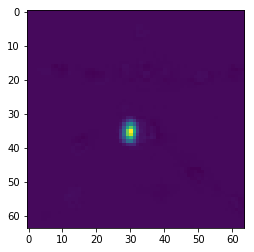

0.0014382799


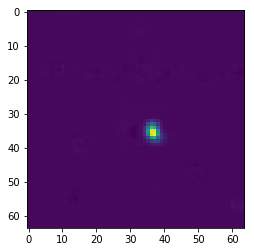

0.001842033


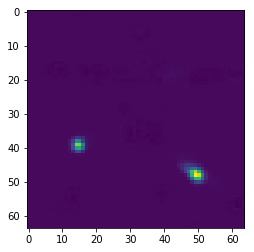

0.0024064519


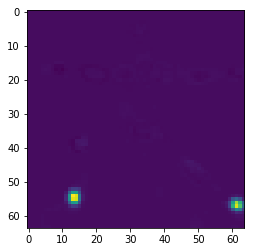

0.0018518481


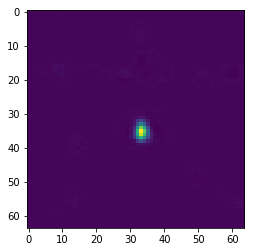

0.0026044762


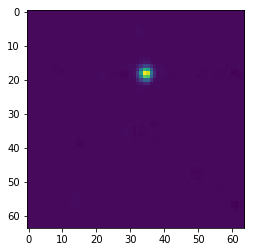

-0.0003884841


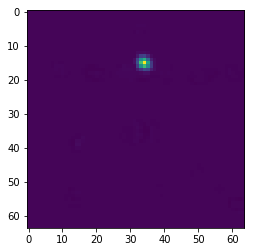

0.0011706344


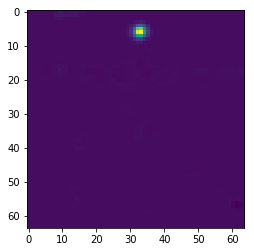

0.002043516


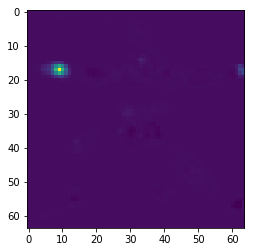

0.0029677907


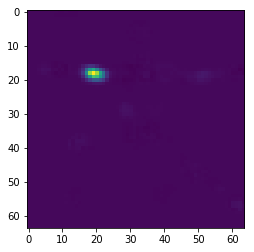

0.0029000738


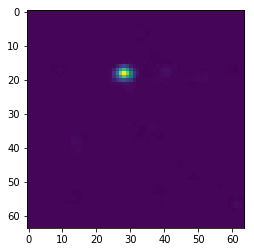

0.0028003291


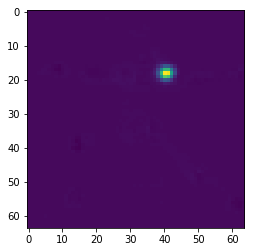

0.0027056988


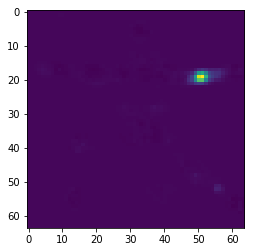

0.0014076888


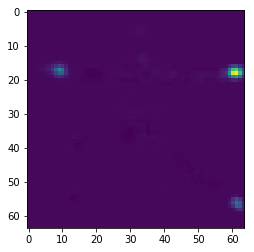

[(135.625, 532.8125, 0.26518866), (145.3125, 377.8125, 0.313339), (290.625, 339.0625, 0.35741532), (358.4375, 348.75, 0.37268507), (474.6875, 465.0, 0.40141678), (125.9375, 523.125, 0.35363188), (319.6875, 339.0625, 0.41007638), (329.375, 174.375, 0.56409407), (329.375, 145.3125, 0.6125205), (319.6875, 58.125, 0.54319257), (87.1875, 164.6875, 0.3403197), (184.0625, 174.375, 0.46889174), (271.25, 174.375, 0.5827207), (387.5, 174.375, 0.47933936), (494.0625, 184.0625, 0.40309754), (590.9375, 174.375, 0.41206595)]


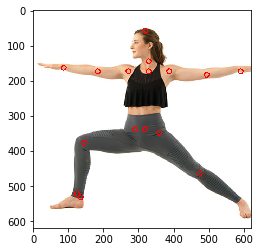

mpii_0.jpg
124.72486183449074
56.73201915317223
(720, 1280, 3)
0.00063593604


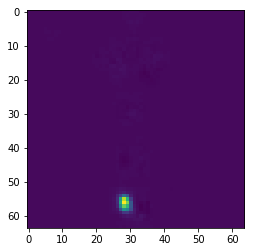

0.0026720813


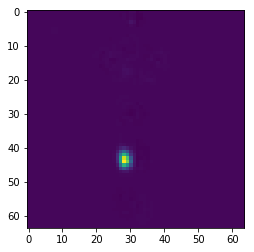

0.0023871108


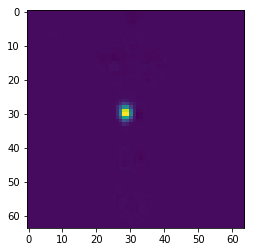

0.0014051896


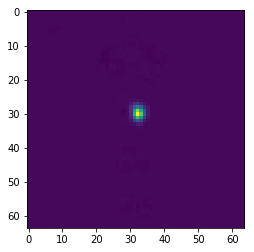

0.0013016133


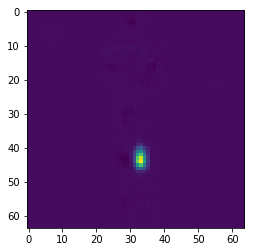

0.0019934925


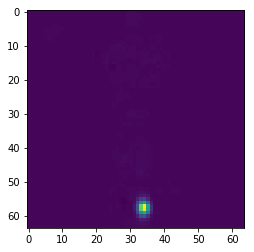

0.0017533244


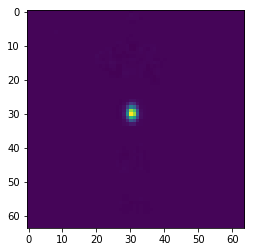

0.0024176594


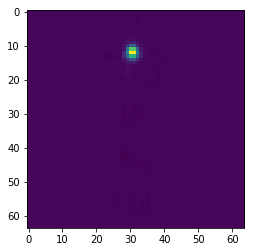

-0.00046796794


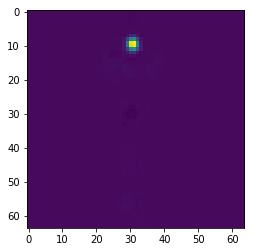

0.00097572006


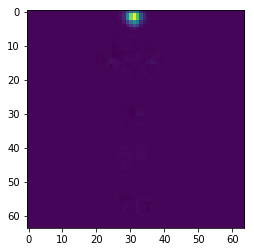

0.0023931514


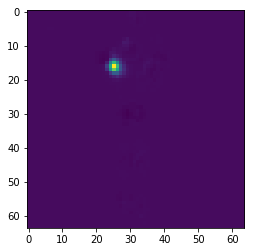

0.0027688718


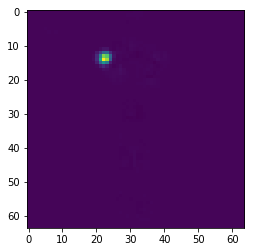

0.0020803693


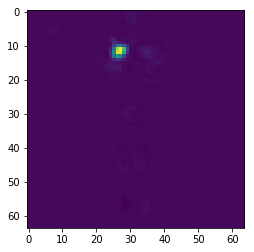

0.0022683882


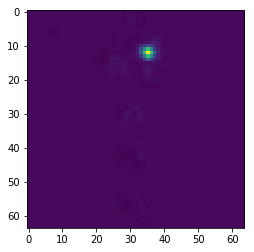

0.0033502758


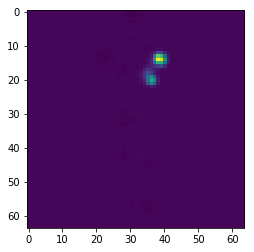

0.0011464227


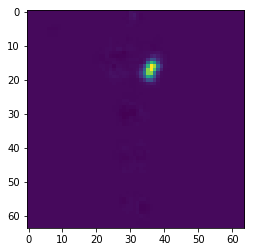

[(560.0, 630.0, 0.32899028), (560.0, 495.0, 0.53092104), (580.0, 337.5, 0.50648093), (640.0, 337.5, 0.4798854), (660.0, 495.0, 0.40171182), (680.0, 641.25, 0.47032878), (600.0, 337.5, 0.49840808), (600.0, 135.0, 0.4553382), (620.0, 101.25, 0.4983349), (620.0, 22.5, 0.40330675), (500.0, 180.0, 0.5269552), (440.0, 157.5, 0.6572399), (540.0, 123.75, 0.28751588), (700.0, 135.0, 0.31663045), (760.0, 157.5, 0.49496245), (720.0, 191.25, 0.40457594)]


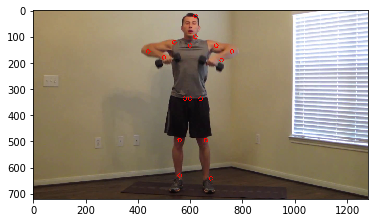

sample.jpg
213.44889960562415
60.10317170430969
(1440, 1080, 3)
0.001073261


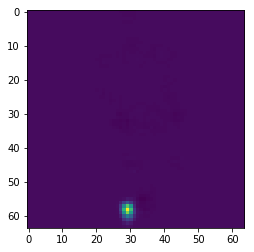

0.0026768944


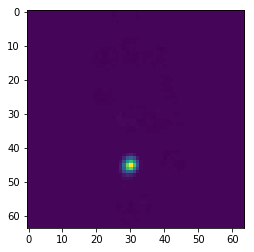

0.0020702805


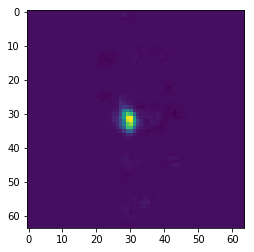

0.0015371135


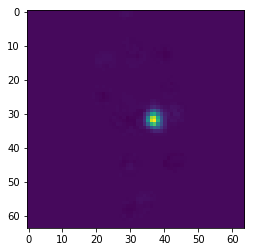

0.0013825209


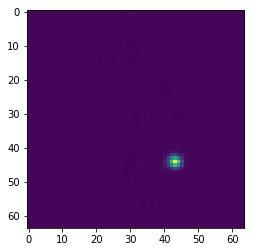

0.002451304


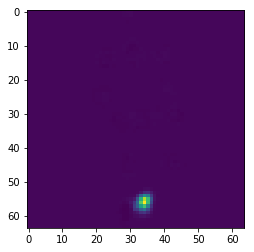

0.0018657059


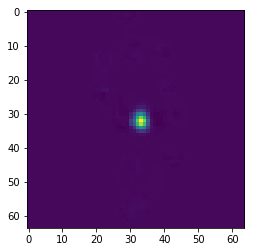

0.0026706103


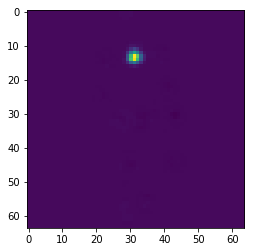

-0.00017957599


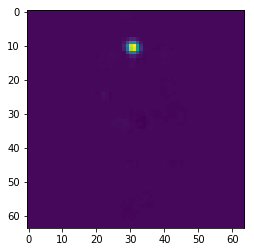

0.0011063641


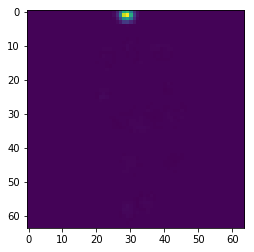

0.0023937137


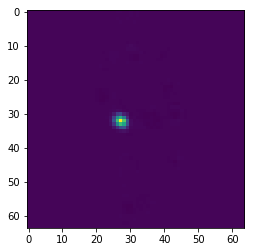

0.0026921595


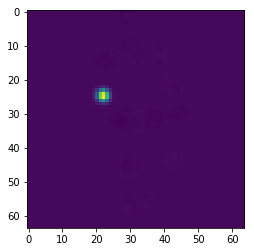

0.002673665


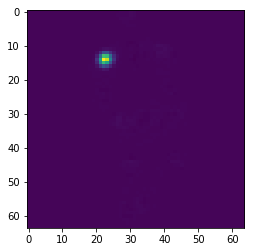

0.0028260276


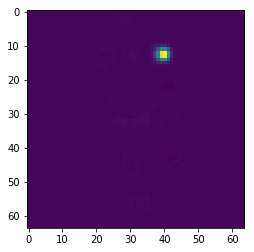

0.0027780368


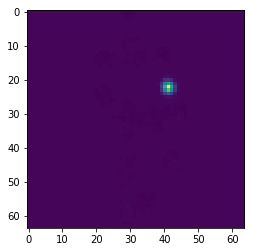

0.0009376437


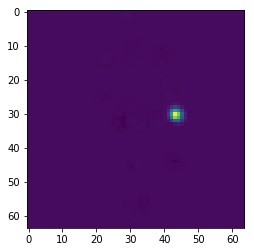

[(489.375, 1305.0, 0.5804045), (506.25, 1012.5, 0.5944955), (506.25, 720.0, 0.21509767), (624.375, 720.0, 0.37131897), (725.625, 990.0, 0.62585753), (573.75, 1260.0, 0.60612744), (556.875, 720.0, 0.3892124), (523.125, 292.5, 0.5945888), (523.125, 225.0, 0.60068434), (489.375, 22.5, 0.5877473), (455.625, 720.0, 0.6309214), (371.25, 562.5, 0.60298634), (371.25, 315.0, 0.5753996), (675.0, 270.0, 0.52917403), (691.875, 495.0, 0.6746561), (725.625, 675.0, 0.6089473)]


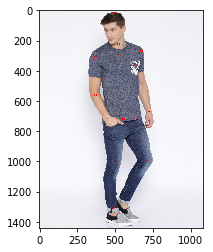

In [33]:
img_dir="../../data/test_images"

for file in os.listdir(img_dir):
    print(file)
    img_file=os.path.join(img_dir,file)
    image_data=imageio.imread(img_file)
    out,scale = inference_file(img_file,xnet)

    kps = post_process_heatmap(out[0,:,:,:])
    #first element of batch
    out=out[0]
    print(np.mean(image_data))
    print(np.std(image_data))
    print(np.shape(image_data))
    for j in range(out.shape[-1]):
        print(np.mean(out[:,:,j]))
        plt.imshow(out[:,:,j])
        plt.show()
    mkps = list() 
    for i, _kp in enumerate(kps):
        _conf = _kp[2]
        mkps.append((_kp[0]*scale[1]*4, _kp[1]*scale[0]*4, _conf))
    print(mkps)
    #normally conf th is around 0.2 but currently no joints are found
    cvmat = render_joints(imageio.imread(img_file), mkps, conf_th=0.02)
    plt.imshow(cvmat)
    plt.show()
